In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [4]:
np.random.seed(0)

In [5]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [7]:
assert(X_train.shape[0]== y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0]== y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:]== (28,28)), "The dimensions of the images are not 28x28."
assert(X_test.shape[1:]== (28,28)), "The dimensions of the images are not 28x28."

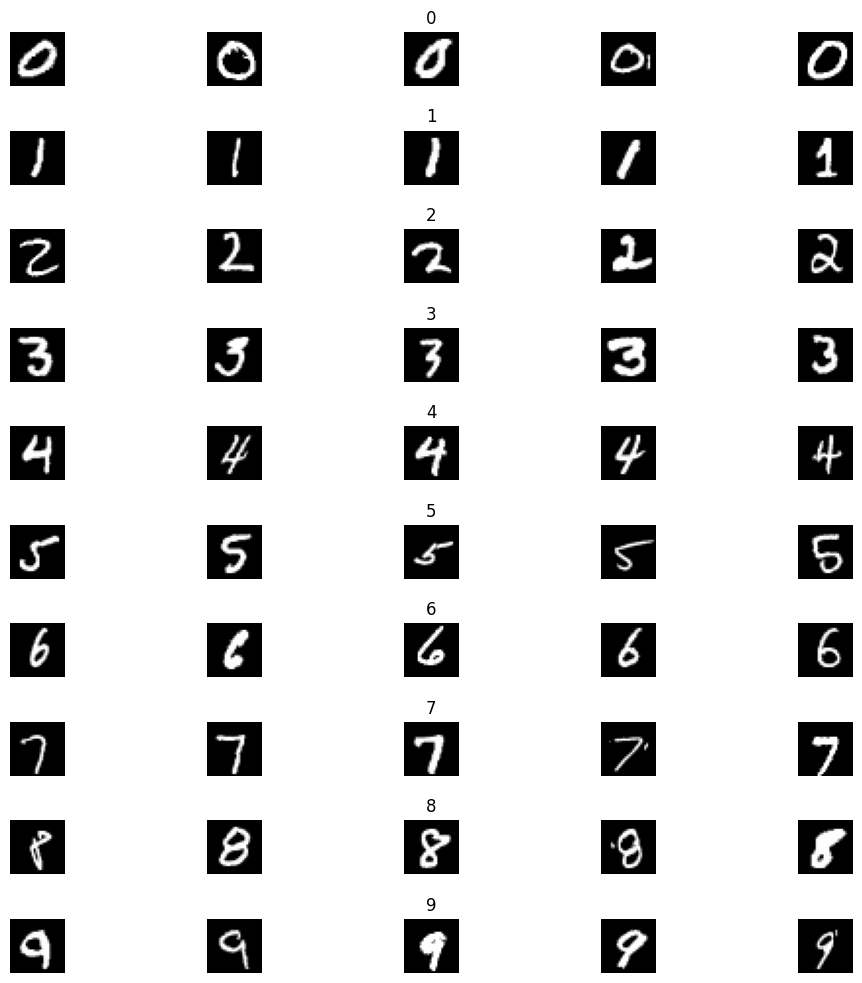

In [8]:
num_of_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(10,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), :, :] ,cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))




Text(0, 0.5, 'Number of images')

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


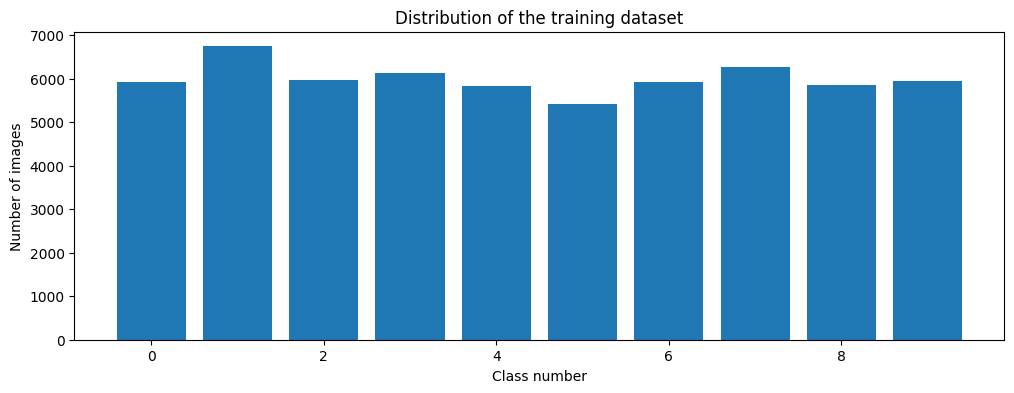

In [9]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_test.shape)


(10000, 784)


In [13]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [14]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs =10, batch_size=200, verbose =1, shuffle =1)

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.5384 - accuracy: 0.8363 - val_loss: 0.2376 - val_accuracy: 0.9307
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2845 - accuracy: 0.9177 - val_loss: 0.2264 - val_accuracy: 0.9400
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2500 - accuracy: 0.9288 - val_loss: 0.2065 - val_accuracy: 0.9397
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2324 - accuracy: 0.9333 - val_loss: 0.2043 - val_accuracy: 0.9428
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2236 - accuracy: 0.9347 - val_loss: 0.2002 - val_accuracy: 0.9457
Epoch 6/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2177 - accuracy: 0.9367 - val_loss: 0.1971 - val_accuracy: 0.9458
Epoch 7/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2119 - accuracy: 0.9384 - val_loss: 0.1984 - val_accuracy: 0.9477
Epoch 

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2219332456588745
Test accuracy: 0.9366000294685364


In [17]:
import requests
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)

<Response [200]>


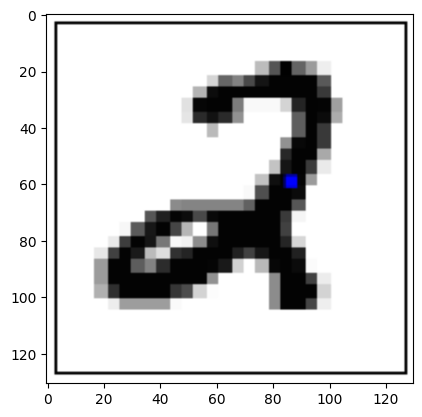

In [18]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)


[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 188  85
    1 100 155 238 255 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 237 166  79 100  57  16   3
    3   3   3  81 255 255 255 255 255  46]
 [255 255 255 255 255 255 255 255 255 255 228  21   4   3 113 227 227 227
  193  33   3   9 168 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 227  27  12  26 136 253 253 253
  237  70   3   8 167 255 255 255 255  45]
 [255 255 255 255 255 255 255 255 255 255 255 255 186 255 255 25

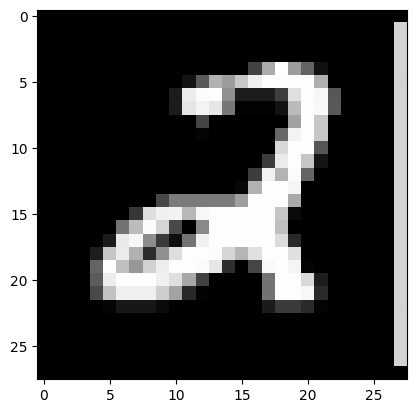

In [19]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
print(gray_scale)